# Preprocessamento de dados

In [2]:
!pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# Importando os pacotes/bibliotecas

import pandas as pd
import numpy as np
from statistics import mode, mean
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Lendo os Datasets

# df1 = pd.read_csv('./drive/MyDrive/teste/teste/acidentes2019_todas_causas_tipos.csv', sep=';', encoding='cp1252')
# df2 = pd.read_csv('./drive/MyDrive/teste/teste/acidentes2020_todas_causas_tipos.csv', sep=';', encoding='utf-8')
# df3 = pd.read_csv('./drive/MyDrive/teste/teste/acidentes2021_todas_causas_tipos.csv', sep=';', encoding='cp1252')
df1 = pd.read_csv('./drive/MyDrive/Colab Notebooks/acidentes2019_todas_causas_tipos.csv', sep=';', encoding='cp1252')
df2 = pd.read_csv('./drive/MyDrive/Colab Notebooks/acidentes2020_todas_causas_tipos.csv', sep=';', encoding='utf-8')
df3 = pd.read_csv('./drive/MyDrive/Colab Notebooks/acidentes2021_todas_causas_tipos.csv', sep=';', encoding='cp1252')
df = pd.concat([df1, df2, df3])
df

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_principal,...,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop
0,182210.0,402103.0,2019-01-01,terça-feira,01:30:00,SP,116.0,218,GUARULHOS,Sim,...,Masculino,0,1,0,0,"-23,46052014","-46,48772478",SR-SP,DEL6/1,UOP01/SP
1,182210.0,402106.0,2019-01-01,terça-feira,01:30:00,SP,116.0,218,GUARULHOS,Sim,...,Masculino,0,1,0,0,"-23,46052014","-46,48772478",SR-SP,DEL6/1,UOP01/SP
2,182210.0,402104.0,2019-01-01,terça-feira,01:30:00,SP,116.0,218,GUARULHOS,Sim,...,Feminino,0,1,0,0,"-23,46052014","-46,48772478",SR-SP,DEL6/1,UOP01/SP
3,182210.0,402102.0,2019-01-01,terça-feira,01:30:00,SP,116.0,218,GUARULHOS,Sim,...,Masculino,0,1,0,0,"-23,46052014","-46,48772478",SR-SP,DEL6/1,UOP01/SP
4,182211.0,402126.0,2019-01-01,terça-feira,01:30:00,PR,373.0,"177,3",PONTA GROSSA,Sim,...,Masculino,0,1,0,0,"-25,05533957","-50,22776753",SR-PR,DEL7/3,UOP01/PR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448075,415073.0,927619.0,2021-12-13,segunda-feira,06:55:00,SP,116.0,115,TAUBATE,Sim,...,Feminino,1,0,0,0,-23.049605,-45.599737,SR-SP,UOP02,DEL02
448076,415112.0,927810.0,2021-11-11,quinta-feira,11:25:00,MG,381.0,385,SAO GONCALO DO RIO ABAIXO,Sim,...,Feminino,0,1,0,0,-19.828952,-43.355656,SR-MG,UOP01,DEL01
448077,415112.0,927809.0,2021-11-11,quinta-feira,11:25:00,MG,381.0,385,SAO GONCALO DO RIO ABAIXO,Sim,...,Masculino,0,1,0,0,-19.828952,-43.355656,SR-MG,UOP01,DEL01
448078,415604.0,929165.0,2021-12-24,sexta-feira,19:30:00,MG,381.0,439,SABARA,Sim,...,Masculino,0,1,0,0,-19.809277,-43.78706,SR-MG,UOP01,DEL01


In [6]:
# Exibindo os tipos de dados 

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1174228 entries, 0 to 448079
Data columns (total 37 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   id                      1174228 non-null  float64
 1   pesid                   1076909 non-null  float64
 2   data_inversa            1174228 non-null  object 
 3   dia_semana              1174228 non-null  object 
 4   horario                 1174228 non-null  object 
 5   uf                      1174228 non-null  object 
 6   br                      1171691 non-null  float64
 7   km                      1171691 non-null  object 
 8   municipio               1174228 non-null  object 
 9   causa_principal         1174228 non-null  object 
 10  causa_acidente          1174228 non-null  object 
 11  ordem_tipo_acidente     1174187 non-null  float64
 12  tipo_acidente           1174187 non-null  object 
 13  classificacao_acidente  1174227 non-null  object 
 14  fas

In [7]:
# Verificando os valores nulos

df.isnull().sum()

id                             0
pesid                      97319
data_inversa                   0
dia_semana                     0
horario                        0
uf                             0
br                          2537
km                          2537
municipio                      0
causa_principal                0
causa_acidente                 0
ordem_tipo_acidente           41
tipo_acidente                 41
classificacao_acidente         1
fase_dia                       0
sentido_via                    0
condicao_metereologica         0
tipo_pista                     0
tracado_via                    0
uso_solo                       0
id_veiculo                     1
tipo_veiculo                   0
marca                      53931
ano_fabricacao_veiculo     66743
tipo_envolvido                 0
estado_fisico                  0
idade                     230449
sexo                           0
ilesos                         0
feridos_leves                  0
feridos_gr

In [8]:
# Substituindo os valores nulos da coluna idade e removendo os valores nulos restantes

df['idade'].fillna(df['idade'].loc[df['idade'] > 0].mean(), inplace=True)
df.dropna(inplace=True)
df.columns

Index(['id', 'pesid', 'data_inversa', 'dia_semana', 'horario', 'uf', 'br',
       'km', 'municipio', 'causa_principal', 'causa_acidente',
       'ordem_tipo_acidente', 'tipo_acidente', 'classificacao_acidente',
       'fase_dia', 'sentido_via', 'condicao_metereologica', 'tipo_pista',
       'tracado_via', 'uso_solo', 'id_veiculo', 'tipo_veiculo', 'marca',
       'ano_fabricacao_veiculo', 'tipo_envolvido', 'estado_fisico', 'idade',
       'sexo', 'ilesos', 'feridos_leves', 'feridos_graves', 'mortos',
       'latitude', 'longitude', 'regional', 'delegacia', 'uop'],
      dtype='object')

In [9]:
# Removendo os valores da coluna sexo que não quero do dataset

df.drop(df.loc[df['sexo'] == 'Ignorado'].index, inplace=True)
df.drop(df.loc[df['sexo'] == 'Não Informado'].index, inplace=True)
Counter(df['sexo'])

Counter({'Feminino': 198243, 'Masculino': 625323})

In [10]:
# Verificando algumas estasticas dos dados

df.describe()

,id,pesid,br,ordem_tipo_acidente,id_veiculo,ano_fabricacao_veiculo,idade,ilesos,feridos_leves,feridos_graves,mortos
count,823566.000000,823566.000000,823566.000000,823566.000000,823566.000000,823566.000000,823566.000000,823566.000000,823566.000000,823566.000000,823566.000000
mean,305626.991428,681053.444252,217.602901,1.616249,548795.974710,2010.240853,39.136973,0.434118,0.381765,0.133942,0.050174
std,63992.927761,143786.738246,130.503500,0.992138,117700.880754,7.587683,44.922237,0.495641,0.485820,0.340590,0.218305
min,182210.000000,402092.000000,10.000000,1.000000,324863.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,254454.000000,565582.250000,101.000000,1.000000,454293.000000,2007.000000,27.000000,0.000000,0.000000,0.000000,0.000000
50%,310760.500000,691480.500000,163.000000,1.000000,556891.000000,2011.000000,37.000000,0.000000,0.000000,0.000000,0.000000
75%,360785.000000,804484.500000,356.000000,2.000000,650246.000000,2015.000000,47.000000,1.000000,1.000000,0.000000,0.000000
max,415112.000000,927810.000000,495.000000,15.000000,750738.000000,2021.000000,2020.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
# Realizando a substituição dos valores na coluna idade
media = mean(idade for idade in df['idade'] if idade > 0 and idade < 120)
print(int(media))
df['idade'].loc[df['idade'] < 0] = int(media)
df['idade'].loc[df['idade'] > 120] = int(media)

df['idade'].describe()

37


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


count    823566.000000
mean         37.853144
std          14.743479
min           0.000000
25%          27.000000
50%          37.000000
75%          47.000000
max         120.000000
Name: idade, dtype: float64

In [12]:
# Removendo registros duplicados caso há algum

print(Counter(df.duplicated()))
df.drop_duplicates(inplace=True)
df

Counter({False: 823566})


,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_principal,...,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop
0,182210.0,402103.0,2019-01-01,terça-feira,01:30:00,SP,116.0,218,GUARULHOS,Sim,...,Masculino,0,1,0,0,"-23,46052014","-46,48772478",SR-SP,DEL6/1,UOP01/SP
1,182210.0,402106.0,2019-01-01,terça-feira,01:30:00,SP,116.0,218,GUARULHOS,Sim,...,Masculino,0,1,0,0,"-23,46052014","-46,48772478",SR-SP,DEL6/1,UOP01/SP
2,182210.0,402104.0,2019-01-01,terça-feira,01:30:00,SP,116.0,218,GUARULHOS,Sim,...,Feminino,0,1,0,0,"-23,46052014","-46,48772478",SR-SP,DEL6/1,UOP01/SP
3,182210.0,402102.0,2019-01-01,terça-feira,01:30:00,SP,116.0,218,GUARULHOS,Sim,...,Masculino,0,1,0,0,"-23,46052014","-46,48772478",SR-SP,DEL6/1,UOP01/SP
4,182211.0,402126.0,2019-01-01,terça-feira,01:30:00,PR,373.0,"177,3",PONTA GROSSA,Sim,...,Masculino,0,1,0,0,"-25,05533957","-50,22776753",SR-PR,DEL7/3,UOP01/PR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448073,415073.0,927621.0,2021-12-13,segunda-feira,06:55:00,SP,116.0,115,TAUBATE,Sim,...,Masculino,1,0,0,0,-23.049605,-45.599737,SR-SP,UOP02,DEL02
448074,415073.0,927620.0,2021-12-13,segunda-feira,06:55:00,SP,116.0,115,TAUBATE,Sim,...,Feminino,1,0,0,0,-23.049605,-45.599737,SR-SP,UOP02,DEL02
448075,415073.0,927619.0,2021-12-13,segunda-feira,06:55:00,SP,116.0,115,TAUBATE,Sim,...,Feminino,1,0,0,0,-23.049605,-45.599737,SR-SP,UOP02,DEL02
448076,415112.0,927810.0,2021-11-11,quinta-feira,11:25:00,MG,381.0,385,SAO GONCALO DO RIO ABAIXO,Sim,...,Feminino,0,1,0,0,-19.828952,-43.355656,SR-MG,UOP01,DEL01


# Analise Bivariada

In [13]:
# Porcentagem de acidentes por sexo

tb1 = df.groupby('sexo')['id'].count() / 823566 * 100
tb1

sexo
Feminino     24.071295
Masculino    75.928705
Name: id, dtype: float64

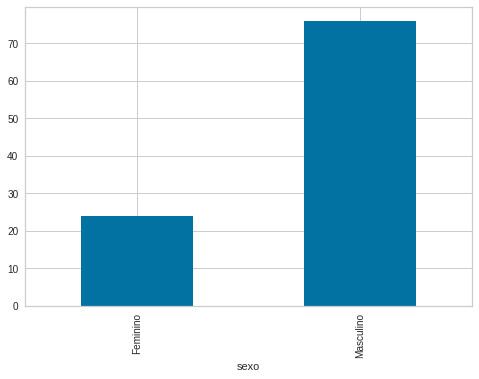

In [14]:
tb1.plot(kind='bar');

In [15]:
# Porcentagem de acidentes por sexo em cada estado

tb2 = df.groupby(['uf','sexo'])['id'].count() / df.groupby(['uf'])['id'].count() * 100
tb2

uf  sexo     
AC  Feminino     30.097952
    Masculino    69.902048
AL  Feminino     19.200000
    Masculino    80.800000
AM  Feminino     26.308725
    Masculino    73.691275
AP  Feminino     27.762199
    Masculino    72.237801
BA  Feminino     22.716581
    Masculino    77.283419
CE  Feminino     19.584009
    Masculino    80.415991
DF  Feminino     26.396094
    Masculino    73.603906
ES  Feminino     22.216907
    Masculino    77.783093
GO  Feminino     28.452650
    Masculino    71.547350
MA  Feminino     22.857637
    Masculino    77.142363
MG  Feminino     23.485272
    Masculino    76.514728
MS  Feminino     26.391806
    Masculino    73.608194
MT  Feminino     21.660319
    Masculino    78.339681
PA  Feminino     23.467230
    Masculino    76.532770
PB  Feminino     24.268345
    Masculino    75.731655
PE  Feminino     20.737630
    Masculino    79.262370
PI  Feminino     22.198320
    Masculino    77.801680
PR  Feminino     24.381682
    Masculino    75.618318
RJ  Feminino  

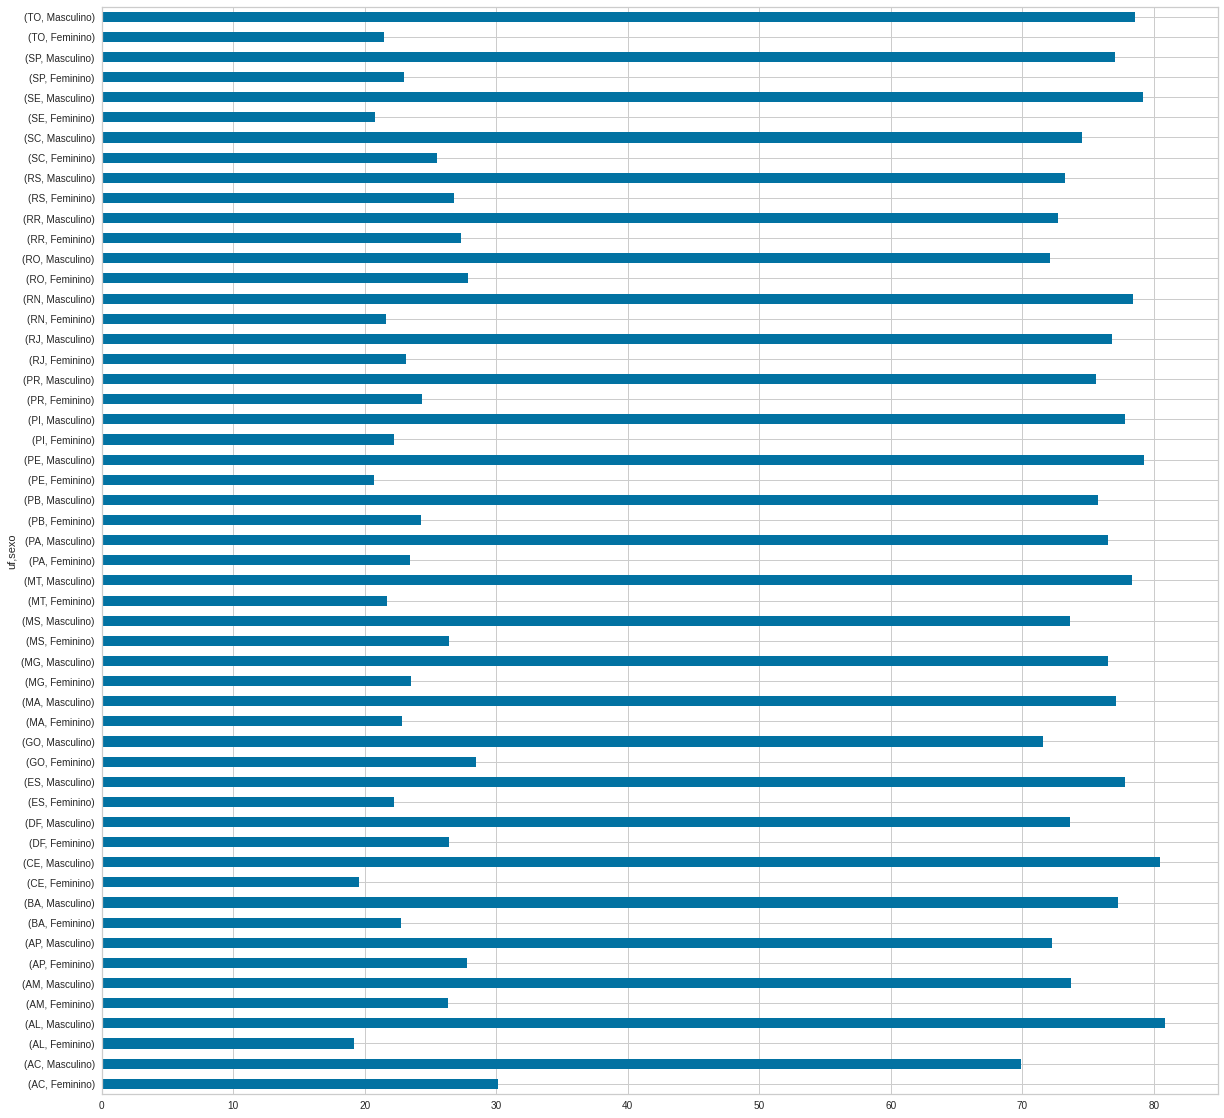

In [16]:
tb2.plot(kind='barh', figsize=(20,20));

In [17]:
# Numero de obitos do tipo do acidente em funcao da faixa etaria

df['comb_idade'] = pd.cut(df['idade'], 
                        [0,9,19,29,39,49,59,69,79,89,120], 
                        labels=['até 9 anos','de 10 a 19 anos','de 20 a 29 anos','de 30 a 39 anos','de 40 a 49 anos','de 50 a 59 anos',
                                'de 60 a 69 anos','de 70 a 79 anos','de 80 a 89 anos','Maior que 90 anos'],)

tb3 = pd.pivot_table(df, values='mortos', index='tipo_acidente', columns='comb_idade', aggfunc='sum')
tb3

comb_idade,até 9 anos,de 10 a 19 anos,de 20 a 29 anos,de 30 a 39 anos,de 40 a 49 anos,de 50 a 59 anos,de 60 a 69 anos,de 70 a 79 anos,de 80 a 89 anos,Maior que 90 anos
tipo_acidente,,,,,,,,,,
Atropelamento de Animal,1,19,92,79,43,36,10,12,1,0
Atropelamento de Pedestre,51,192,495,640,1230,572,388,165,86,20
Capotamento,57,151,575,649,553,409,264,80,24,3
Colisão com objeto,34,77,406,342,344,217,156,48,6,1
Colisão com objeto em movimento,1,2,20,20,16,17,12,4,2,0
Colisão com objeto estático,31,125,559,607,503,255,168,73,6,6
Colisão frontal,165,407,1681,1701,1621,1080,606,210,60,5
Colisão lateral,28,50,254,218,219,170,67,30,3,0
Colisão lateral mesmo sentido,6,11,116,94,121,59,38,7,6,0


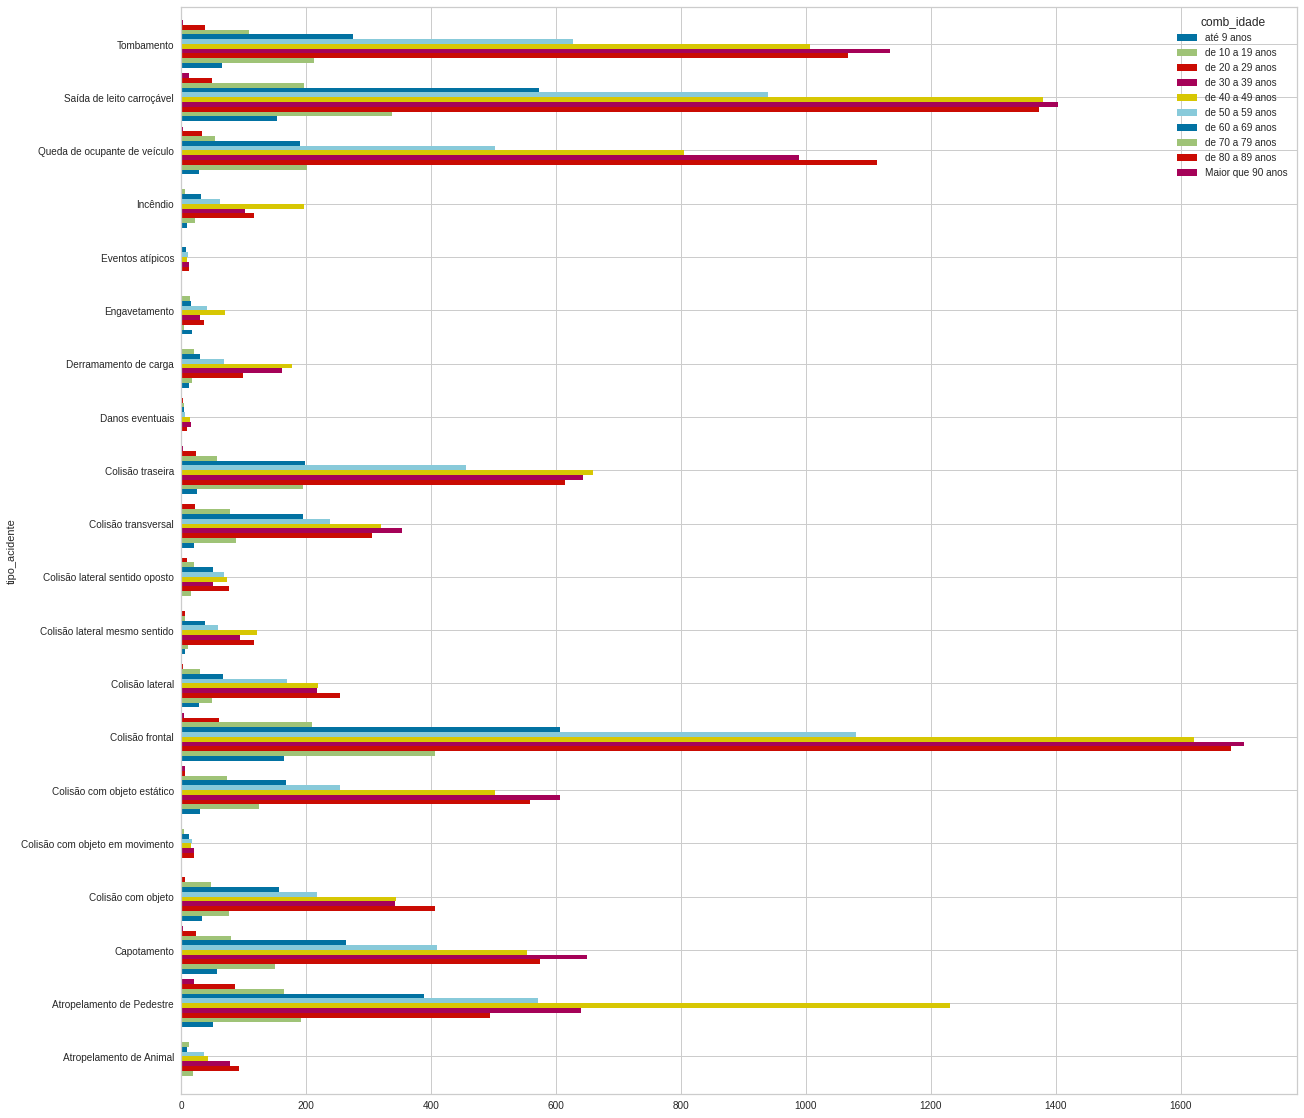

In [18]:
tb3.plot(kind='barh', figsize=(20,20), width=0.9);

In [19]:
# numero de obitos do tipo do acidente em funcao do sexo das vitimas

tb4 = pd.pivot_table(df, values='mortos', index='tipo_acidente', columns='sexo', aggfunc='sum')
tb4

sexo,Feminino,Masculino
tipo_acidente,,
Atropelamento de Animal,49,244
Atropelamento de Pedestre,600,3240
Capotamento,675,2095
Colisão com objeto,368,1272
Colisão com objeto em movimento,18,76
Colisão com objeto estático,476,1864
Colisão frontal,1698,5853
Colisão lateral,210,829
Colisão lateral mesmo sentido,153,305


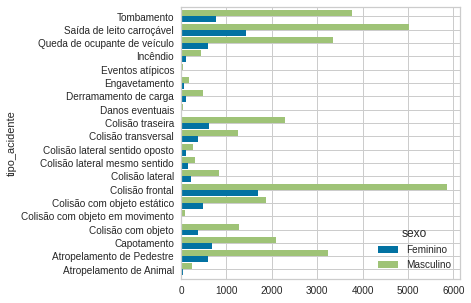

In [20]:
tb4.plot(kind='barh', figsize=(5,5), width=0.9);

In [21]:
# numero de obitos da causa do acidente em funcao do sexo das vitimas

tb5 = pd.pivot_table(df, values='mortos', index='causa_acidente', columns='comb_idade', aggfunc='sum')
tb5

comb_idade,até 9 anos,de 10 a 19 anos,de 20 a 29 anos,de 30 a 39 anos,de 40 a 49 anos,de 50 a 59 anos,de 60 a 69 anos,de 70 a 79 anos,de 80 a 89 anos,Maior que 90 anos
causa_acidente,,,,,,,,,,
Acessar a via sem observar a presença dos outros veículos,6,18,90,99,111,80,50,24,9,0
Acesso irregular,0,3,12,29,32,21,11,1,0,0
Acostamento em desnível,0,0,6,8,9,5,7,0,0,0
Acumulo de areia ou detritos sobre o pavimento,0,0,8,13,2,4,0,0,0,0
Acumulo de água sobre o pavimento,0,5,32,17,41,25,7,1,1,0
...,...,...,...,...,...,...,...,...,...,...
Transitar na contramão,18,71,353,340,336,182,106,24,26,0
Transitar no acostamento,0,13,17,21,25,23,7,5,0,0
Ultrapassagem Indevida,50,114,517,395,440,284,171,76,12,2


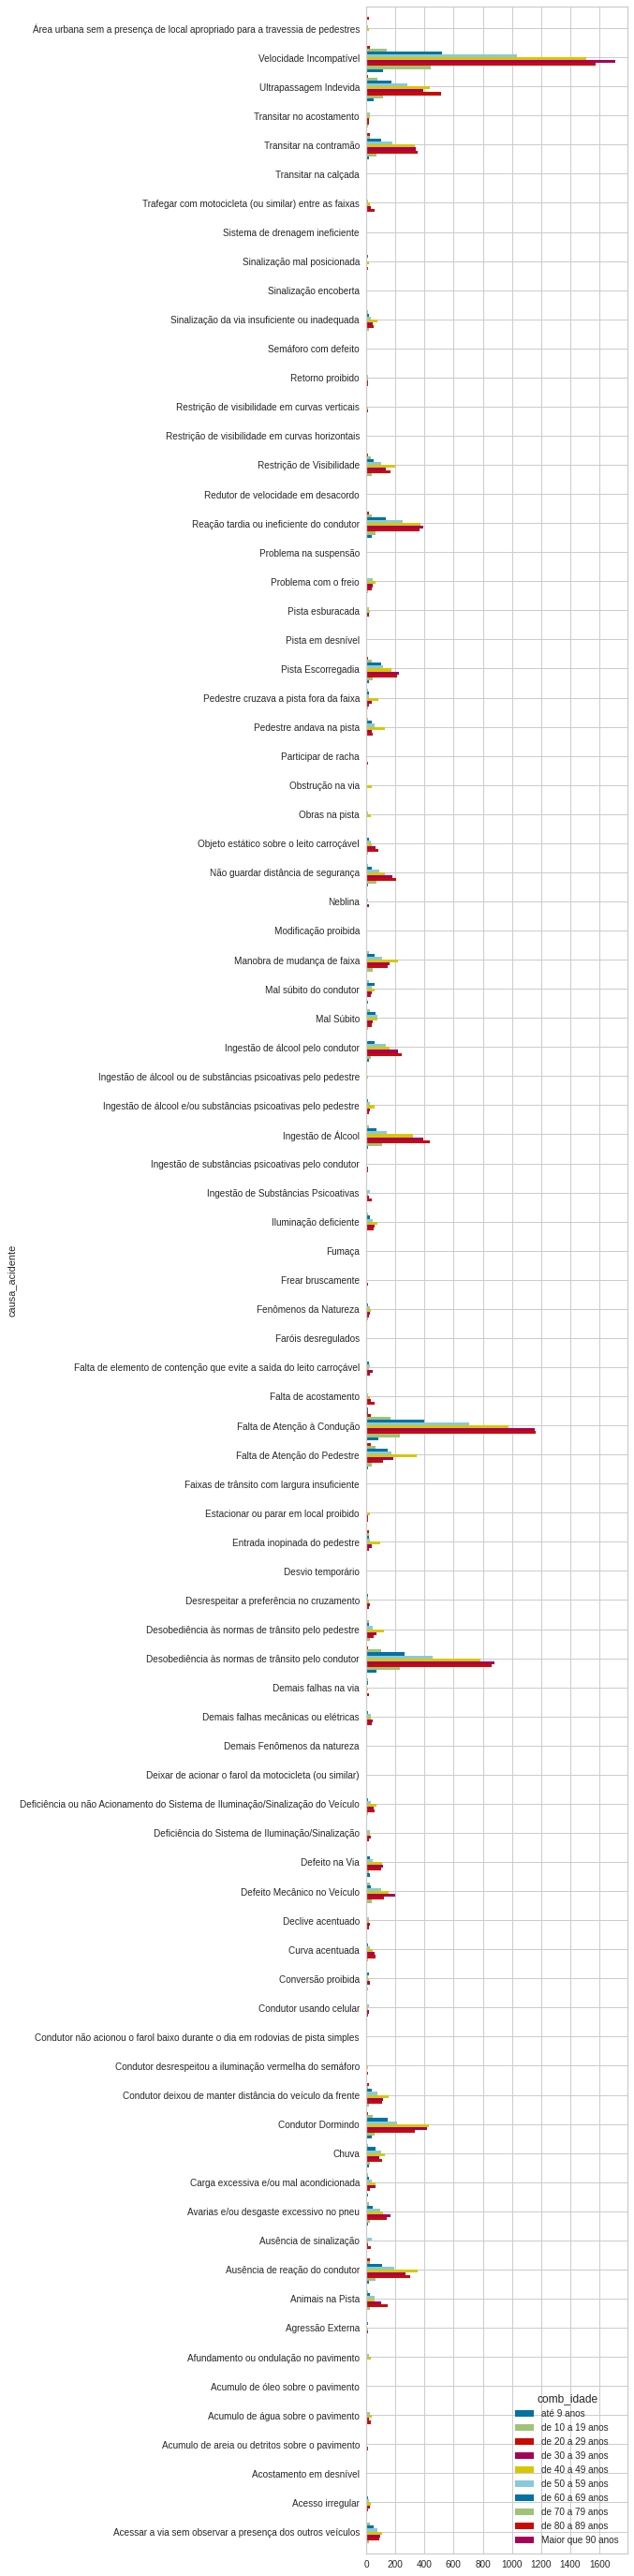

In [22]:
tb5.plot(kind='barh', figsize=(5,50), width=1);

In [23]:
# numero de obitos da causa do acidente em funcao do sexo das vitimas

tb6 = pd.pivot_table(df, values='mortos', index='causa_acidente', columns='sexo', aggfunc='sum')
tb6

sexo,Feminino,Masculino
causa_acidente,,
Acessar a via sem observar a presença dos outros veículos,101,386
Acesso irregular,9,100
Acostamento em desnível,1,34
Acumulo de areia ou detritos sobre o pavimento,3,24
Acumulo de água sobre o pavimento,28,101
...,...,...
Transitar na contramão,339,1122
Transitar no acostamento,19,92
Ultrapassagem Indevida,505,1560


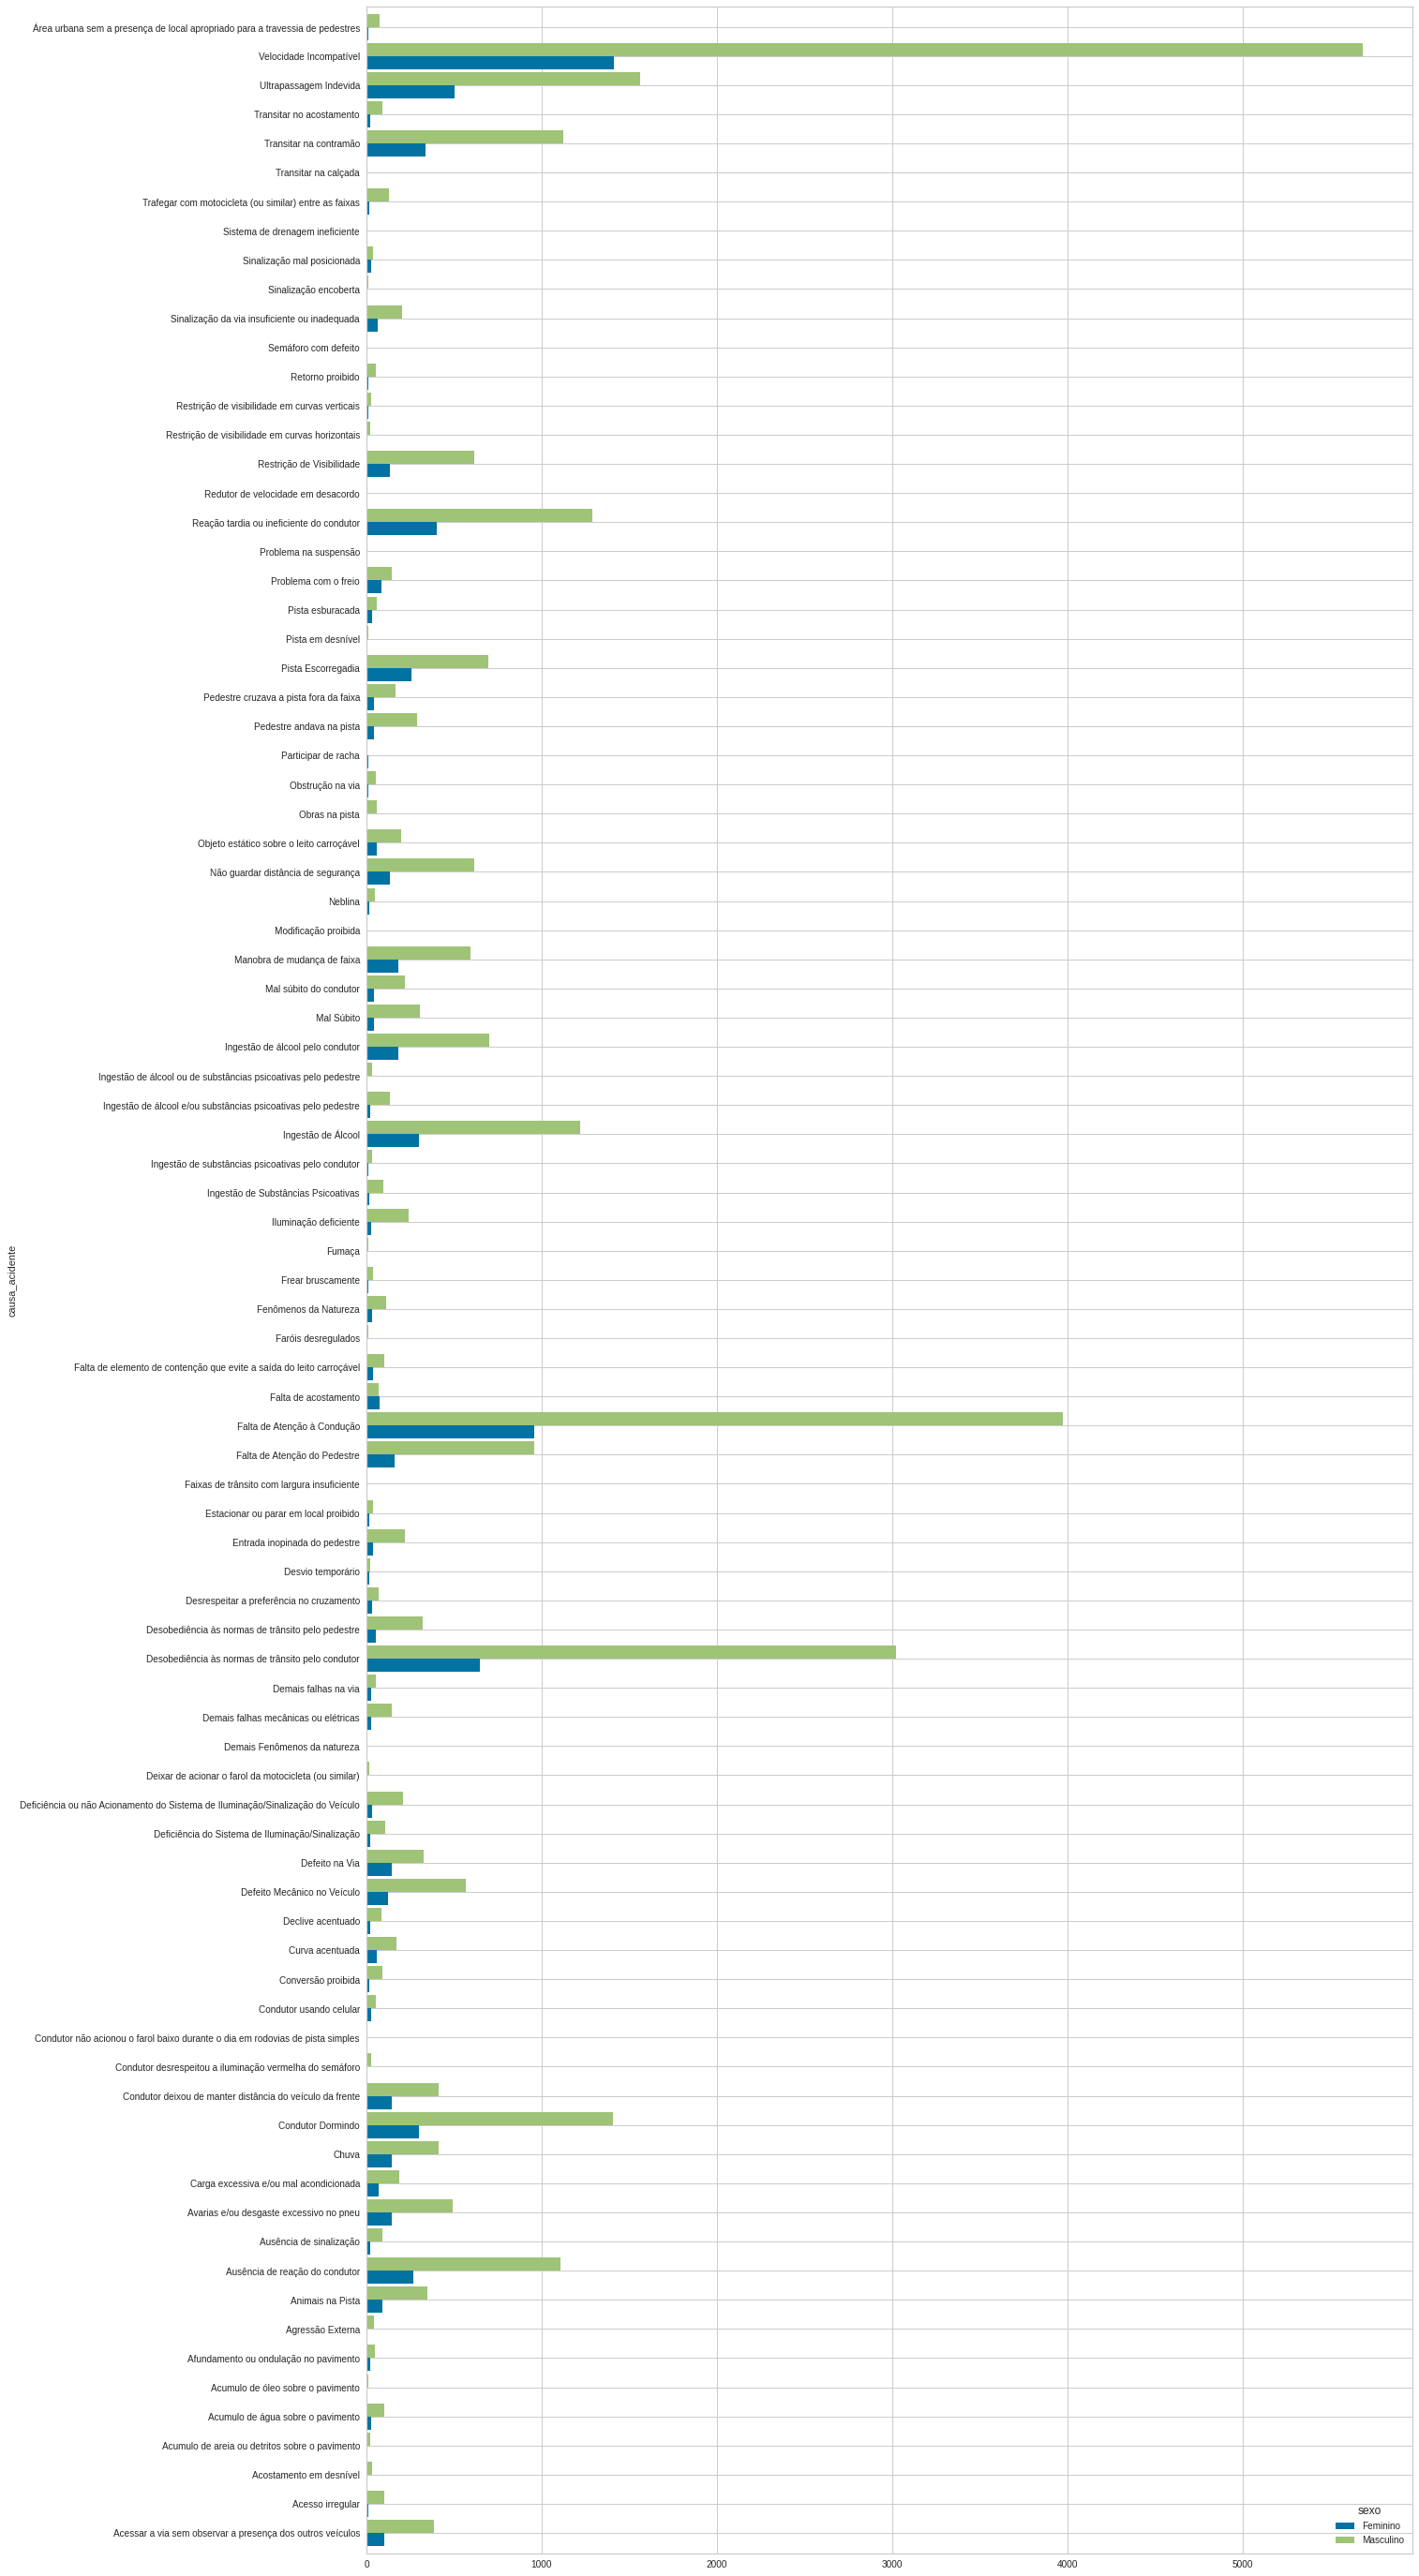

In [24]:
tb6.plot(kind='barh', figsize=(20,50), width=0.9);

In [25]:
df.columns
# Rótulos de colunas do Dataframe

Index(['id', 'pesid', 'data_inversa', 'dia_semana', 'horario', 'uf', 'br',
       'km', 'municipio', 'causa_principal', 'causa_acidente',
       'ordem_tipo_acidente', 'tipo_acidente', 'classificacao_acidente',
       'fase_dia', 'sentido_via', 'condicao_metereologica', 'tipo_pista',
       'tracado_via', 'uso_solo', 'id_veiculo', 'tipo_veiculo', 'marca',
       'ano_fabricacao_veiculo', 'tipo_envolvido', 'estado_fisico', 'idade',
       'sexo', 'ilesos', 'feridos_leves', 'feridos_graves', 'mortos',
       'latitude', 'longitude', 'regional', 'delegacia', 'uop', 'comb_idade'],
      dtype='object')

# Datasets para o DataMart

In [26]:
# # Dataset referentes as pessoas envolvidas nos acidentes

# pes = pd.DataFrame(df, columns=['pesid', 'tipo_envolvido', 'estado_fisico', 'idade', 'sexo', 'ilesos', 'feridos_leves', 'feridos_graves', 'mortos'])
# pes.to_csv('./drive/MyDrive/teste/teste/pessoas_acidentes.csv')

In [27]:
# # Dataset referente aos veiculos envolvidos nos acidentes

# vec = pd.DataFrame(df, columns=['id_veiculo', 'tipo_veiculo', 'marca', 'ano_fabricacao_veiculo'])
# vec.to_csv('./drive/MyDrive/teste/teste/veiculos_acidentes.csv')

In [28]:
# # Dataset referente as condições dos acidentes

# acd = pd.DataFrame(df, columns=['id','pesid','id_veiculo', 'data_inversa', 'dia_semana', 'horario', 'uf', 'br',
#        'km', 'municipio', 'causa_principal', 'causa_acidente',
#        'ordem_tipo_acidente', 'tipo_acidente', 'classificacao_acidente',
#        'fase_dia', 'sentido_via', 'condicao_metereologica', 'tipo_pista',
#        'tracado_via', 'uso_solo', 'latitude', 'longitude', 'regional', 'delegacia', 'uop'])
# acd.to_csv('./drive/MyDrive/teste/teste/todos_acidentes.csv')

# Machine learning

### Pré processamento para o machine learning

In [29]:
df.corr()

,id,pesid,br,ordem_tipo_acidente,id_veiculo,ano_fabricacao_veiculo,idade,ilesos,feridos_leves,feridos_graves,mortos
id,1.000000,0.999949,-0.032297,0.099246,0.999910,0.084010,-0.009768,-0.003257,-0.022312,0.021455,0.023576
pesid,0.999949,1.000000,-0.032319,0.099255,0.999897,0.084044,-0.009846,-0.003144,-0.022182,0.021616,0.022777
br,-0.032297,-0.032319,1.000000,-0.004888,-0.032032,-0.050358,0.002097,-0.010602,-0.007372,0.016355,0.014959
ordem_tipo_acidente,0.099246,0.099255,-0.004888,1.000000,0.099318,0.017904,-0.005586,-0.035630,-0.022384,0.043496,0.062847
id_veiculo,0.999910,0.999897,-0.032032,0.099318,1.000000,0.084193,-0.009585,-0.003136,-0.022455,0.021546,0.023477
ano_fabricacao_veiculo,0.084010,0.084044,-0.050358,0.017904,0.084193,1.000000,-0.021339,0.007799,0.014110,-0.016356,-0.023589
idade,-0.009768,-0.009846,0.002097,-0.005586,-0.009585,-0.021339,1.000000,0.108966,-0.100690,-0.032297,0.027068
ilesos,-0.003257,-0.003144,-0.010602,-0.035630,-0.003136,0.007799,0.108966,1.000000,-0.688276,-0.344450,-0.201308
feridos_leves,-0.022312,-0.022182,-0.007372,-0.022384,-0.022455,0.014110,-0.100690,-0.688276,1.000000,-0.309034,-0.180610
feridos_graves,0.021455,0.021616,0.016355,0.043496,0.021546,-0.016356,-0.032297,-0.344450,-0.309034,1.000000,-0.090387


In [41]:
X_df = df.iloc[:,[9,10,12,14,16,18,24,26,27]]
catg = [0,1,2,3,4,5,6,8]

label = LabelEncoder()
X_df.iloc[catg] = X_df.iloc[catg].apply(label.fit_transform)


X_df = np.array(X_df, dtype=str).reshape(len(X_df), -1)

onehot = ColumnTransformer(transformers = [('OneHot', OneHotEncoder(), catg)], remainder= 'passthrough')
X_df = onehot.fit_transform(X_df).toarray()


scaler = StandardScaler()
X_df = scaler.fit_transform(X_df)


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1851: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)
/usr/local/lib/python3.7/dist-packages/sklearn/compose/_column_transformer.py:780: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  for X in Xs


### Leandro, analise sobre se vai haver mortes em relação as variaveis que compõem o acidente

In [42]:
y_df = df.iloc[:,31]
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.25, random_state=42)

94.12507528218677
              precision    recall  f1-score   support

           0       0.96      0.98      0.97    195701
           1       0.31      0.15      0.20     10191

    accuracy                           0.94    205892
   macro avg       0.63      0.57      0.59    205892
weighted avg       0.92      0.94      0.93    205892



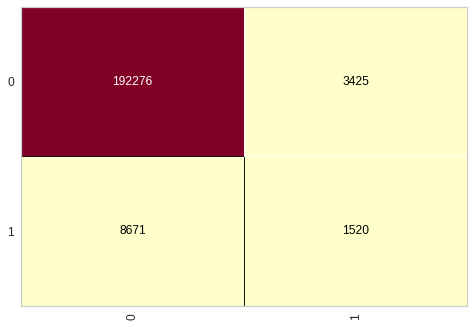

In [43]:
random_florest = RandomForestClassifier(n_estimators= 40, criterion = 'entropy', random_state = 0)
random_florest.fit(X_train, y_train)
previsoes = random_florest.predict(X_test)

print(accuracy_score(y_test, previsoes) * 100 )

cm = ConfusionMatrix(random_florest)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

print(classification_report(y_test, previsoes))

### Tielles, analise sobre se vai haver pessoas com ferimentos graves em relação as variaveis que compõem o acidente

In [44]:
y_df = df.iloc[:,30]
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.25, random_state=45)

In [ ]:
# naive = GaussianNB()
# naive.fit(X_train, y_train)
# previsoes = naive.predict(X_test)

from sklearn.svm import SVC
svm = SVC(kernel = 'rbf', random_state = 1, C = 100.0)
svm.fit(X_train, y_train)
previsoes = svm_credit.predict(X_test)

print(accuracy_score(y_test, previsoes) * 100 )

cm = ConfusionMatrix(svm)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

print(classification_report(y_test, previsoes))

### Sabrina, analise sobre se vai haver pessoas com ferimentos leves em relação as variaveis que compõem o acidente

In [37]:
y_df = df.iloc[:,29]
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.25, random_state=40)

63.578478037029114
              precision    recall  f1-score   support

           0       0.69      0.75      0.72    127542
           1       0.53      0.44      0.48     78350

    accuracy                           0.64    205892
   macro avg       0.61      0.60      0.60    205892
weighted avg       0.63      0.64      0.63    205892



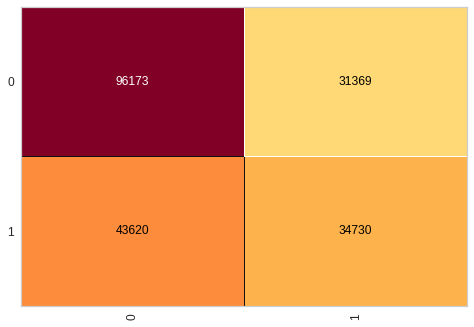

In [38]:
arvore = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
arvore.fit(X_train, y_train)
previsoes = arvore.predict(X_test)

print(accuracy_score(y_test, previsoes) * 100 )

cm = ConfusionMatrix(arvore)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

print(classification_report(y_test, previsoes))

### Pedrinho, analise sobre se vai haver pessoas ilesas em relação as variaveis que compõem o acidente

In [39]:
y_df = df.iloc[:,28]
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.25, random_state=46)

64.7771647271385
              precision    recall  f1-score   support

           0       0.66      0.77      0.71    116422
           1       0.62      0.49      0.55     89470

    accuracy                           0.65    205892
   macro avg       0.64      0.63      0.63    205892
weighted avg       0.64      0.65      0.64    205892



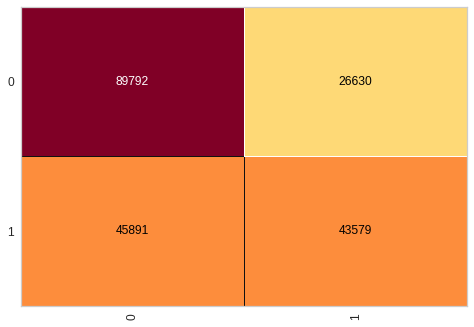

In [40]:
logistic = LogisticRegression(random_state=1)
logistic.fit(X_train, y_train)
previsoes = logistic.predict(X_test)

print(accuracy_score(y_test, previsoes) * 100 )

cm = ConfusionMatrix(logistic)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

print(classification_report(y_test, previsoes))

causa_principal, 
causa_acidente, 
tipo_acidente, 
fase_dia, 
condicao_metereologica, 
tracado_via, 
tipo_envolvido, 
idade, 
sexo , 